# 연습문제
    - 07_3.Education.csv
    - 학부(4개 학부)와 학년에 따라
    - 교양강의운영, 전공강의운영, 비교과운영, 종합점수가 있다.
## 1. 학년에 따라서 종합점수의 차이가 있는가?

## 설정

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import pingouin as pg
from scipy import stats
import statsmodels.api as sm

c:\anaconda\lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
!apt-get install -y fonts-nanum
!fc-chache -fv
!rm ~/.cache/matplotlib -rf

'apt-get' is not recognized as an internal or external command,
operable program or batch file.
'fc-chache' is not recognized as an internal or external command,
operable program or batch file.


'rm' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
sns.set_theme(style="darkgrid")
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

## 데이터 불러오기

In [4]:
edu_df = pd.read_csv('./data/07_3.Education.csv', encoding = 'cp949')
edu_df.head()

,학과,학년,교양만족도,전공만족도,비교과만족도,전체만족도
0,1,1,47.6,40.5,40.0,46.7
1,1,1,33.3,35.7,33.3,33.6
2,1,1,50.0,52.4,50.0,50.4
3,1,1,35.7,28.5,40.0,36.1
4,1,1,54.7,92.8,43.3,56.2


In [5]:
edu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   학과      286 non-null    int64  
 1   학년      286 non-null    int64  
 2   교양만족도   286 non-null    float64
 3   전공만족도   286 non-null    float64
 4   비교과만족도  286 non-null    float64
 5   전체만족도   286 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 13.5 KB


In [7]:
# 범주형 변수 처리

edu_df['학과'].replace({1:'학과1', 2:'학과2', 3:'학과3', 4:'학과4'}, inplace = True)
edu_df['학과'] = edu_df['학과'].astype('category')

edu_df['학년'].replace({1:'1학년', 2:'2학년', 3:'3학년', 4:'4학년'}, inplace = True)
edu_df['학년'] = edu_df['학년'].astype('category')

edu_df.head()

C:\Users\SikBread\AppData\Local\Temp\ipykernel_7696\2038492794.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  edu_df['학과'].replace({1:'학과1', 2:'학과2', 3:'학과3', 4:'학과4'}, inplace = True)
C:\Users\SikBread\AppData\Local\Temp\ipykernel_7696\2038492794.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

,학과,학년,교양만족도,전공만족도,비교과만족도,전체만족도
0,학과1,1학년,47.6,40.5,40.0,46.7
1,학과1,1학년,33.3,35.7,33.3,33.6
2,학과1,1학년,50.0,52.4,50.0,50.4
3,학과1,1학년,35.7,28.5,40.0,36.1
4,학과1,1학년,54.7,92.8,43.3,56.2


In [10]:
# 분석 변수가 여러 개일 때

num_feature = ['학과', '학년', '교양만족도', '전공만족도', '비교과만족도', '전체만족도']

for num in num_feature:
    print("---", num, "---")
    results = edu_df.groupby('학과')[num].describe().round(3)
    print(results, "\n")

--- 학과 ---
    count unique  top freq
학과                        
학과1    36      1  학과1   36
학과2    65      1  학과2   65
학과3    92      1  학과3   92
학과4    93      1  학과4   93 

--- 학년 ---
    count unique  top freq
학과                        
학과1    36      4  3학년   13
학과2    65      4  2학년   24
학과3    92      4  2학년   35
학과4    93      4  2학년   33 

--- 교양만족도 ---
     count    mean     std   min   25%   50%     75%   max
학과                                                        
학과1   36.0  50.889  19.863  14.8  38.1  47.0  64.300  83.3
학과2   65.0  52.742  18.359  14.8  42.9  50.0  64.200  83.3
학과3   92.0  47.841  15.248  16.6  39.3  47.6  52.325  85.7
학과4   93.0  50.529  16.029  14.4  42.9  50.0  57.100  83.3 

--- 전공만족도 ---
     count    mean     std   min     25%   50%    75%    max
학과                                                          
학과1   36.0  54.114  25.614  23.8  32.125  48.8  71.15  100.0
학과2   65.0  55.066  17.394  21.4  47.600  53.6  64.20   95.2
학과3   92.0  54.990  18

C:\Users\SikBread\AppData\Local\Temp\ipykernel_7696\2207588326.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  results = edu_df.groupby('학과')[num].describe().round(3)
C:\Users\SikBread\AppData\Local\Temp\ipykernel_7696\2207588326.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  results = edu_df.groupby('학과')[num].describe().round(3)
C:\Users\SikBread\AppData\Local\Temp\ipykernel_7696\2207588326.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future def

In [15]:
# 등분산이라고 가정
pg.anova(dv = '전체만족도',
         between = '학년',
         data = edu_df,
         detailed = True).round(3)

,Source,SS,DF,MS,F,p-unc,np2
0,학년,1509.507,3,503.169,2.242,0.084,0.023
1,Within,63294.364,282,224.448,NaN,NaN,NaN


In [14]:
# 등분산이라고 가정
pg.anova(dv = '전공만족도',
         between = '학년',
         data = edu_df,
         detailed = True).round(3)

,Source,SS,DF,MS,F,p-unc,np2
0,학년,1245.671,3,415.224,1.06,0.366,0.011
1,Within,110457.387,282,391.693,NaN,NaN,NaN


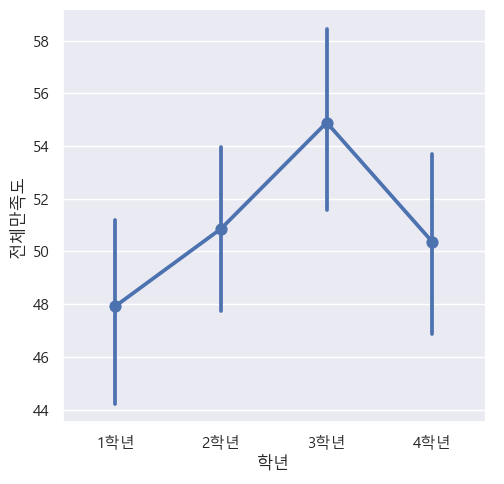

In [17]:
# 그래프

sns.catplot(x = "학년",
            y = "전체만족도",
            kind = "point",
            data = edu_df)
plt.show()

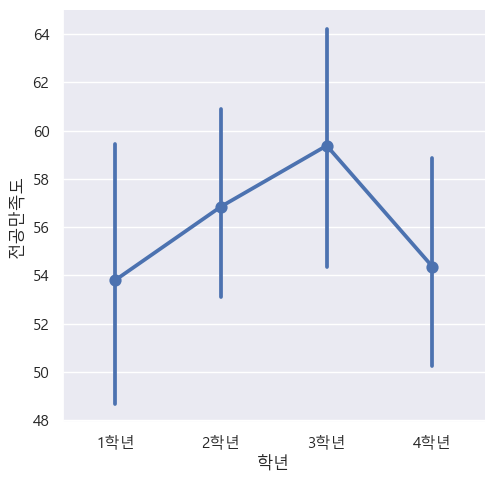

In [26]:
# 그래프

sns.catplot(x = "학년",
            y = "전공만족도",
            kind = "point",
            data = edu_df)
plt.show()

학년에 따른 전공만족도 와 학년에 따른 전체만족도는 차이가 없음